In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
uber = pd.read_csv('My Uber Drives - 2016.csv')
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [199]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [200]:
uber.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [201]:
uber.shape

(1156, 7)

In [202]:
uber.size

8092

In [203]:
uber.isna().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [204]:
uber.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [205]:
uber['START*'].unique()
uber['STOP*'].unique()
ex=pd.Series([1,2,3,None])
ex.dropna().unique()

array([1., 2., 3.])

In [206]:
uber.head()
start_location_counts = dict.fromkeys(set(df['START*'].append(df['STOP*'])), 0)
df = uber.dropna()
for i in df['START*']:
    start_location_counts[i] = start_location_counts.get(i) + 1
start_location_counts

df2 = pd.DataFrame(start_location_counts.values(),index=start_location_counts.keys(),columns=pd.Index(['Trips']))
df2

end_location_counts = dict.fromkeys(set(df['START*'].append(df['STOP*'])), 0)
for i in df['STOP*']:
    end_location_counts[i] = end_location_counts.get(i) + 1
df3 = pd.DataFrame(end_location_counts.values(),index=end_location_counts.keys(), columns=pd.Index(['Trips']))
df3.head()

,Trips
Colombo,3
Unknown Location,56
Congress Ave District,3
Georgian Acres,0
Rawalpindi,4


In [207]:
df2 = df[(df['START*'] != 'Unknown Location') & (df['STOP*'] != 'Unknown Location')]
df2.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [208]:
df2.groupby(['START*', 'STOP*']).size().sort_values(ascending=True)

START*                     STOP*            
Menlo Park                 Newark                1
Mountain View              Berkeley              1
New Orleans                Chalmette             1
                           Kenner                1
New York                   Jamaica               1
                           Long Island City      1
                           Queens                1
                           Queens County         1
Newark                     Menlo Park            1
                           San Francisco         1
North Austin               Coxville              1
Northwoods                 Preston               1
                           Whitebridge           1
Oakland                    Berkeley              1
                           Emeryville            1
                           San Francisco         1
Old City                   Hog Island            1
                           Parkway Museums       1
Palo Alto                  Sunnyvale 

In [209]:
df2.loc[:,'START_DATE*'] = df2['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
df2.loc[:,'END_DATE*'] = df2['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
df2.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [210]:
df2['DIFF'] = df2['END_DATE*'] - df2['START_DATE*']
df2.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00


In [211]:
df2.loc[:,'DIFF'] = df2['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60)+pd.Timedelta.to_pytimedelta(x).seconds/60)


In [224]:
df2.loc[:,'day'] = pd.to_datetime(df2['START_DATE*']).dt.day
df2.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,6
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,6


In [230]:
Jan = df2[pd.to_datetime(df['START_DATE*']).dt.month == 1]
Frb =df2[pd.to_datetime(df['START_DATE*']).dt.month == 2]
March = df2[pd.to_datetime(df['START_DATE*']).dt.month == 3]
April = df2[pd.to_datetime(df['START_DATE*']).dt.month == 4]
May = df2[pd.to_datetime(df['START_DATE*']).dt.month == 5]
June = df2[pd.to_datetime(df['START_DATE*']).dt.month == 6]
July = df2[pd.to_datetime(df['START_DATE*']).dt.month == 7]
Aug = df2[pd.to_datetime(df['START_DATE*']).dt.month == 8]
Sep = df2[pd.to_datetime(df['START_DATE*']).dt.month == 9]
Oct = df2[pd.to_datetime(df['START_DATE*']).dt.month == 10]
Nov = df2[pd.to_datetime(df['START_DATE*']).dt.month == 11]
Dec = df2[pd.to_datetime(df['START_DATE*']).dt.month == 12]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWa

Text(0, 0.5, 'Values')

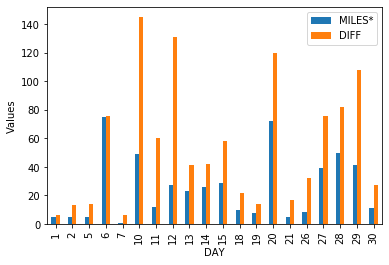

In [252]:
Jan_group = Jan.groupby('day').sum()
Feb_group = Jan.groupby('day').sum()
Mar_group = Jan.groupby('day').sum()
April_group = Jan.groupby('day').sum()
May_group = Jan.groupby('day').sum()
Jun_group = Jan.groupby('day').sum()
July_group = Jan.groupby('day').sum()
Aug_group = Jan.groupby('day').sum()
Sep_group = Jan.groupby('day').sum()
Oct_group = Jan.groupby('day').sum()
Nov_group = Jan.groupby('day').sum()
Dev_group = Jan.groupby('day').sum()


Jan_group.plot(kind='bar')
plt.xlabel("DAY")
plt.ylabel("Values")

In [260]:
miles_day_frame = pd.concat([Jan_group['MILES*'],Feb_group['MILES*'],Mar_group['MILES*'],April_group['MILES*'],
                            May_group['MILES*'],Jun_group['MILES*'],July_group['MILES*'],Aug_group['MILES*'],
                             Sep_group['MILES*'],Oct_group['MILES*']],ignore_index=True, axis=1)
miles_day_frame.columns = ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct']
miles_day_frame.head()

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct
day,,,,,,,,,,
1,5.1,5.1,5.1,5.1,5.1,5.1,5.1,5.1,5.1,5.1
2,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8
5,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7
6,75.1,75.1,75.1,75.1,75.1,75.1,75.1,75.1,75.1,75.1
7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [265]:
a=[1,2,3]

[]